In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from data_analysis_codes import param
from data_analysis_codes.tools import LinData
from data_analysis_codes.tools import GetVars_Plot2d as GVar
from data_analysis_codes.tools import Ricci_CoGrad_Weyl as RCW_file

In [2]:
p = param.pflrw_d3e2_L1821_t1_N32_LCDM()
path = '/home/robynm/simulations/'+p.sim_name+'/'
OGpath = path+'output-0000/pflrw_L1821/'
Lin = LinData.LinData_Class(p, path)
get_var = GVar.Get_var(Lin, OGpath)
RCW = RCW_file.Ricci_CoGrad_Weyl_Class(p.dx)
fI = h5py.File(OGpath+'all_iterations/'+p.sim_name+'_it_000800.hdf5', 'r')

 read time file


In [7]:
def getze_values(f, it):
    curv_dic = get_var.get_the_curv(f, it)
    metric_dic = curv_dic['metric_dic']
    rho = get_var.get_the_rho(f, it)['rho']
    ricci_dic = get_var.get_the_ricci(f, it)
    Tdown4 = np.zeros([4,4,Lin.N,Lin.N,Lin.N])
    Tdown4[0,0] = rho
    
    Edown, Eup, E2, Etrace = RCW.Weyl_E(metric_dic['gdown'], metric_dic['gup'], ricci_dic['RicciS'], ricci_dic['RicciTdown'],
                              curv_dic['Kdown'], Lin.kappa, rho, Lin.Lambda, Tdown4[1:,1:])
    
    Bdown, B2, Btrace = RCW.Weyl_B(Lin.LeviCivita(metric_dic['gdown']), metric_dic['gdown'], metric_dic['gup'],
                                ricci_dic['Christoffeludd'], curv_dic['Kdown'], Lin.kappa, Tdown4)
    
    Ham = ricci_dic['RicciS'] + (2/3)*curv_dic['K']**2 - 2*curv_dic['A2'] - 2*Lin.kappa*rho - 2*Lin.Lambda
    
    return E2, B2, Etrace, Btrace, Ham

def diagplot(A, At, c):
    N = 16
    Aplot = np.zeros(N)
    for i in range(N):
        Aplot[i] = A[i,i,i]
    x = np.linspace(-np.sqrt(3)*1821/2, np.sqrt(3)*1821/2, N)
    plt.semilogy(x, abs(Aplot), linestyle='-', color=c, label=At)
    
    for i in range(N):
        Aplot[i] = A[-i,i,i]
    x = np.linspace(-np.sqrt(3)*1821/2, np.sqrt(3)*1821/2, N)
    plt.semilogy(x, abs(Aplot), linestyle='--', color=c)#, label='-x=y=z '+At)
    
    for i in range(N):
        Aplot[i] = A[i,-i,i]
    x = np.linspace(-np.sqrt(3)*1821/2, np.sqrt(3)*1821/2, N)
    plt.semilogy(x, abs(Aplot), linestyle='-.', color=c)#, label='x=-y=z '+At)
    
    for i in range(N):
        Aplot[i] = A[i,i,-i]
    x = np.linspace(-np.sqrt(3)*1821/2, np.sqrt(3)*1821/2, N)
    plt.semilogy(x, abs(Aplot), linestyle=':', color=c)#, label='x=y=-z '+At)

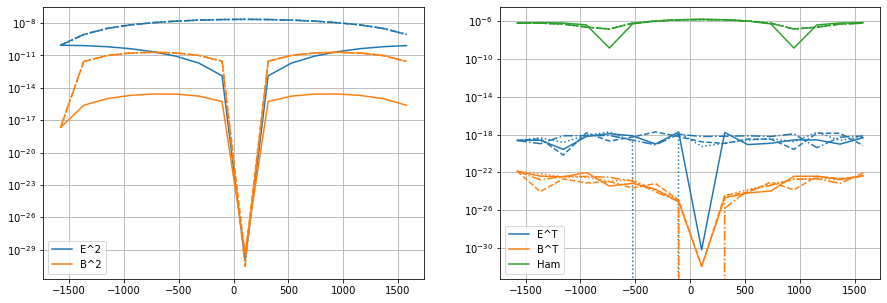

In [8]:
E2, B2, Etrace, Btrace, Ham = getze_values(fI, 800)
plt.figure(figsize=(15,5))
plt.subplot(121)
diagplot(E2, 'E^2', 'C0')
diagplot(B2, 'B^2', 'C1')
plt.legend()
plt.grid()
plt.subplot(122)
diagplot(Etrace, 'E^T', 'C0')
diagplot(Btrace, 'B^T', 'C1')
diagplot(Ham, 'Ham', 'C2')
plt.legend()
plt.grid()

In [14]:
def plot(A, At):
    plt.figure(figsize=(20, 7))
    plt.subplot(131)
    plt.imshow(A[:, :, int(Lin.N/4)])
    plt.colorbar()
    plt.xlabel('x/L')
    plt.ylabel('y/L')
    plt.title(At+', average = {:.2e}'.format(np.average(A)))
    
    plt.subplot(132)
    plt.imshow(A[:, int(Lin.N/4), :])
    plt.colorbar()
    plt.xlabel('x/L')
    plt.ylabel('z/L')
    plt.title(At)
    
    plt.subplot(133)
    plt.imshow(A[int(Lin.N/4), :, :])
    plt.colorbar()
    plt.xlabel('y/L')
    plt.ylabel('z/L')
    plt.title(At)

INITIALLY


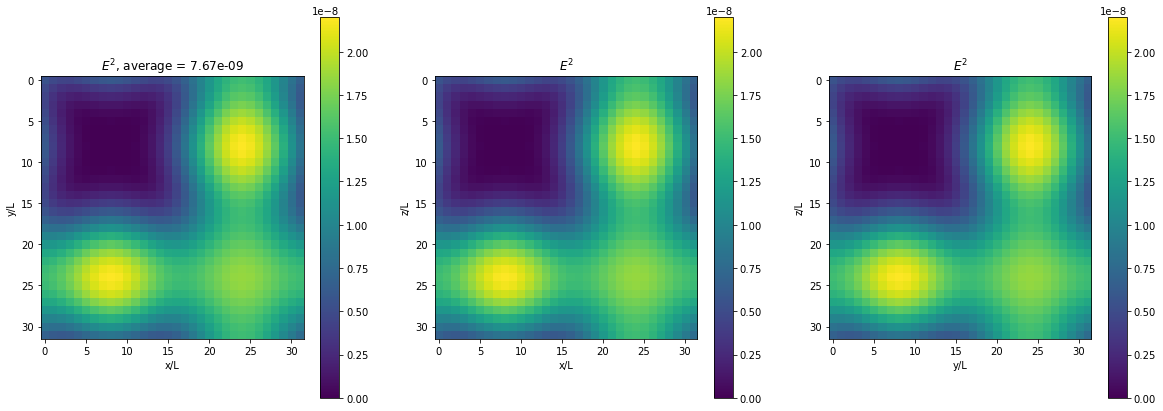

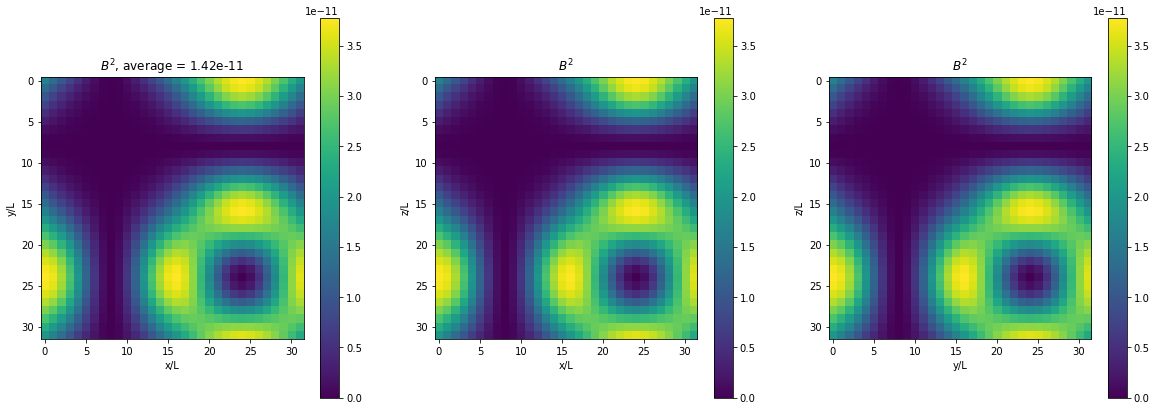

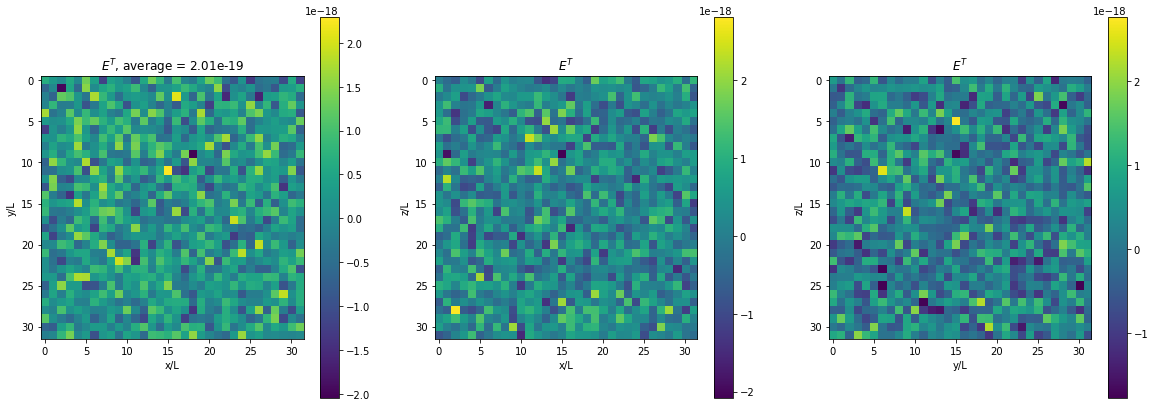

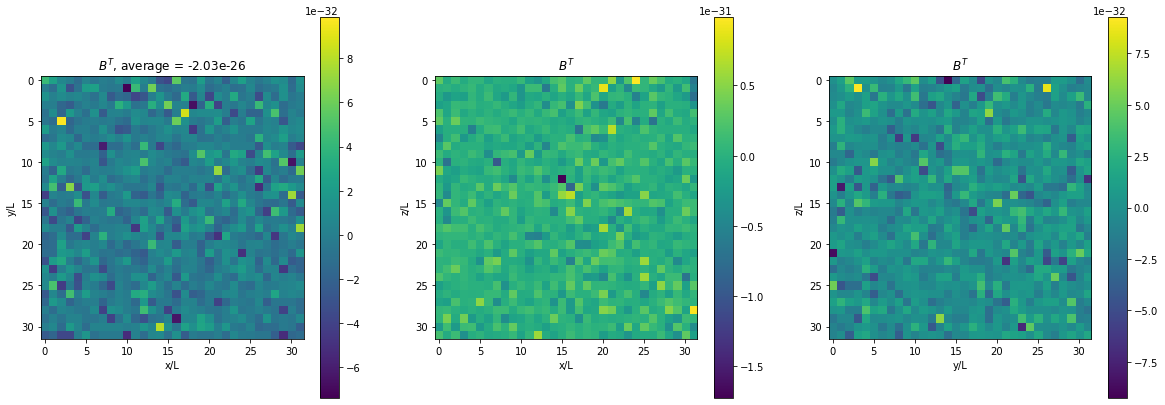

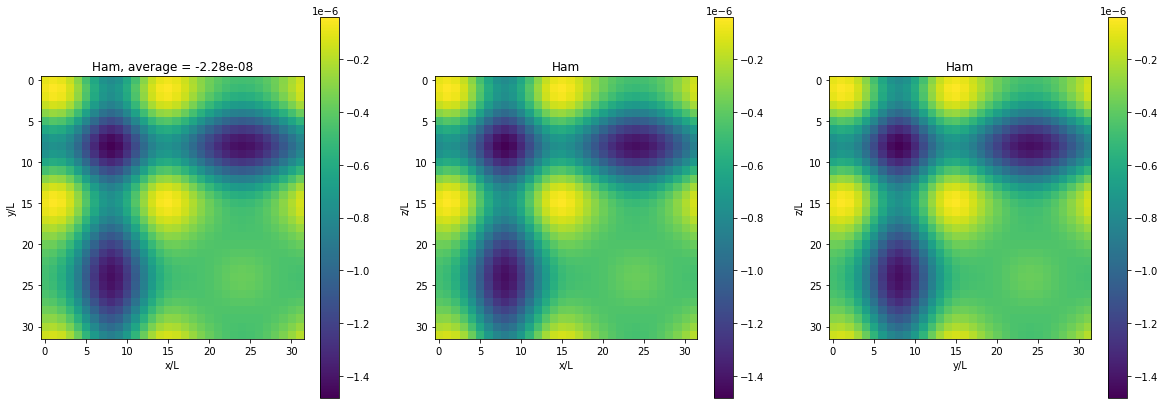

In [22]:
print('INITIALLY')
plot(E2, r'$E^2$')  #E2, B2, Etrace, Btrace, Ham
plot(B2, r'$B^2$')  #E2, B2, Etrace, Btrace, Ham
plot(Etrace, r'$E^T$')  #E2, B2, Etrace, Btrace, Ham
plot(Btrace, r'$B^T$')  #E2, B2, Etrace, Btrace, Ham
plot(Ham, 'Ham')  #E2, B2, Etrace, Btrace, Ham

In [11]:
print('AT THE END')
plot_values(fF, 48600)

AT THE END


NameError: name 'plot_values' is not defined

In [12]:
def diagplot_values(f, it):
    curv_dic = get_var.get_the_curv(f, it)
    metric_dic = curv_dic['metric_dic']
    rho = get_var.get_the_rho(f, it)['rho']
    ricci_dic = get_var.get_the_ricci(f, it)
    Eup, E2 = RCW.Weyl_E(metric_dic['gdown'], metric_dic['gup'], ricci_dic['RicciTdown'],
                              curv_dic['K'], curv_dic['Kdown'], curv_dic['Kmixed'], Lin.kappa, rho, Lin.Lambda)
    Bdown, B2 = RCW.Weyl_B(Lin.LeviCivita(), metric_dic['gup'], metric_dic['gmixed'],
                                ricci_dic['Christoffeludd'], curv_dic['Kdown'])
    Edown = np.einsum('ib...,ja...,ab... -> ij...', metric_dic['gdown'], metric_dic['gdown'], Eup)
    Etrace = np.einsum('ij...,ij...->...', Eup, metric_dic['gdown'])
    Btrace = np.einsum('ij...,ij...->...', Bdown, metric_dic['gup'])
    Ham = ricci_dic['RicciS'] + (2/3)*curv_dic['K']**2 - 2*curv_dic['A2'] - 2*Lin.kappa*rho - 2*Lin.Lambda
    HamE = np.sqrt((ricci_dic['RicciS'])**2 + ((2/3)*curv_dic['K']**2)**2 + (2*curv_dic['A2'])**2 + (2*Lin.kappa*rho)**2 + (2*Lin.Lambda)**2)
    
    plt.figure()
    diagplot(Etrace, r'$E$', 'C0')
    diagplot(np.sqrt(E2), r'$\sqrt{E^2}$', 'C1')
    diagplot(Etrace/np.sqrt(E2), r'$E/\sqrt{E^2}$', 'C2')
    plt.grid()
    plt.legend(bbox_to_anchor=(1,1), fontsize=15)
    
    plt.figure()
    diagplot(Etrace, r'$E$', 'C0')
    diagplot(Edown[0,0], r'$E_{xx}$', 'C1')
    diagplot(Etrace/Edown[0,0], r'$E/E_{xx}$', 'C2')
    plt.grid()
    plt.legend(bbox_to_anchor=(1,1), fontsize=15)
    
    plt.figure()
    diagplot(Etrace, r'$E$', 'C0')
    diagplot(Edown[1,1], r'$E_{yy}$', 'C1')
    diagplot(Etrace/Edown[1,1], r'$E/E_{yy}$', 'C2')
    plt.grid()
    plt.legend(bbox_to_anchor=(1,1), fontsize=15)
    
    plt.figure()
    diagplot(Etrace, r'$E$', 'C0')
    diagplot(Edown[2,2], r'$E_{zz}$', 'C1')
    diagplot(Etrace/Edown[2,2], r'$E/E_{zz}$', 'C2')
    plt.grid()
    plt.legend(bbox_to_anchor=(1,1), fontsize=15)
    
    plt.figure()
    diagplot(Ham, r'$Ham$', 'C0')
    diagplot(Ham/HamE, r'$Ham/[Ham]$', 'C1')
    plt.grid()
    plt.legend(bbox_to_anchor=(1,1), fontsize=15)    
    
def diagplot(A, At, c):
    Aplot = np.zeros(128)
    for i in range(128):
        Aplot[i] = A[i,i,i]
    x = np.linspace(-np.sqrt(3)*1821/2, np.sqrt(3)*1821/2, 128)
    plt.semilogy(x, abs(Aplot), linestyle='-', color=c, label=At)
    
    for i in range(128):
        Aplot[i] = A[-i,i,i]
    x = np.linspace(-np.sqrt(3)*1821/2, np.sqrt(3)*1821/2, 128)
    plt.semilogy(x, abs(Aplot), linestyle='--', color=c)#, label='-x=y=z '+At)
    
    for i in range(128):
        Aplot[i] = A[i,-i,i]
    x = np.linspace(-np.sqrt(3)*1821/2, np.sqrt(3)*1821/2, 128)
    plt.semilogy(x, abs(Aplot), linestyle='-.', color=c)#, label='x=-y=z '+At)
    
    for i in range(128):
        Aplot[i] = A[i,i,-i]
    x = np.linspace(-np.sqrt(3)*1821/2, np.sqrt(3)*1821/2, 128)
    plt.semilogy(x, abs(Aplot), linestyle=':', color=c)#, label='x=y=-z '+At)

In [13]:
diagplot_values(fI, 0)

KeyError: "Unable to open object (object 'ADMBASE::gxx it=0 tl=0 rl=0' doesn't exist)"